# Task 3 :Customer Segmentation / Clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv(r"C:/Users/ADMIN/Downloads/Customers.csv")
products = pd.read_csv(r"C:/Users/ADMIN/Downloads/Products.csv")
transactions = pd.read_csv(r"C:/Users/ADMIN/Downloads/Transactions.csv")


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.4176025701333674


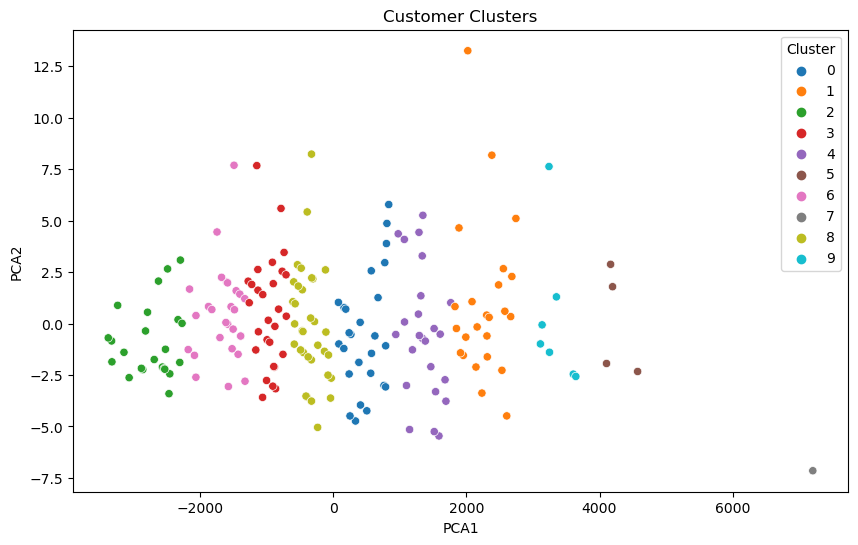

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Preparation
customer_data = pd.merge(customers, transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}), on='CustomerID', how='inner')

# Clustering with KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalValue', 'Quantity']])

# Evaluate Clustering with DB Index
db_index = davies_bouldin_score(customer_data[['TotalValue', 'Quantity']], customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize Clusters (PCA for Dimensionality Reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_data[['TotalValue', 'Quantity']])
customer_data['PCA1'] = reduced_data[:, 0]
customer_data['PCA2'] = reduced_data[:, 1]

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='tab10')
plt.title("Customer Clusters")
plt.show()
